In [6]:
import torch
import torchvision

try:
  from torchinfo import summary

except:
  print("[INFO] -> packages haven't been found.. Trying to install it")
  !pip install torchinfo
  from torchinfo import summary


In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
# CIFAR-10 dataset setup
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import logging
# This specifically silences the 'Clipping' message from the logger
logging.getLogger('matplotlib.image').setLevel(logging.ERROR)

In [9]:
# Dataloader configuration
img_size = 224
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count() 

manual_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2470, 0.2435, 0.2616],
    ),
])


In [10]:
# Load CIFAR-10 train/test datasets
train_data = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=manual_transform,
)
test_data = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=manual_transform,
)

class_names = train_data.classes


In [11]:
# Create dataloaders
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
)
test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS,
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5131699..2.0942786].


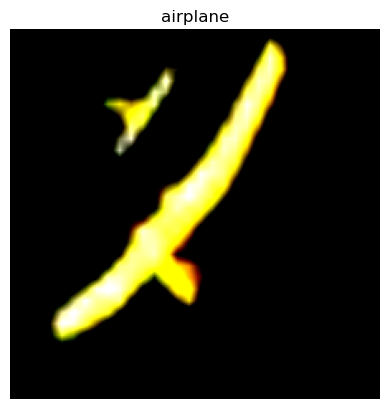

In [12]:
# visualize image
import numpy
import matplotlib.pyplot as plt

image, label = next(iter(train_dataloader))

# get a single image and label
image_batch, label_batch = image[0], label[0]

# view the shapes
image_batch.shape, label_batch.shape

# plot an image
plt.imshow(image_batch.permute(2,1,0))
plt.title(class_names[label_batch]);
plt.axis("off");

### Replicating Machine Learning Paper ViT:

we can break the paper down into small pieces:

* **Inputs** - what goes into the model -> (image, text, etc)
* **Outputs** - what comes out of the model/Layer/block -> (in this case we want image classification labels)
* **Layers** - Takes an input, manipulate it with function -> (for example self-attention)
* **block** - A collection of layers
* **Model** - A collection of blocks

### input shape: H X W X C
### Output shape: N X P^2 * C
### where N is number of patches, P is patch size, C is number of channels
### N = (H * W) / (p ^ 2)
### D is embedding dimension = constant latent vector size



In [13]:
height = 224
width = 224
color_channels = 3
patch_size = 16

# calculating number of patches
num_patches = int((height * width)/ patch_size ** 2)
print(f'Number of patches: {num_patches}')
print("-"* 10)
# input shape
embedding_layer_input_shape = (height, width, color_channels)
print(f'Input shape for embedding layer: {embedding_layer_input_shape}')
# output shape
embedding_layer_output_shape = (num_patches, patch_size ** 2 * color_channels)
print(f'Output shape for embedding layer: {embedding_layer_output_shape} -> (number_of_Patches, embedding_dimenstion) ')

Number of patches: 196
----------
Input shape for embedding layer: (224, 224, 3)
Output shape for embedding layer: (196, 768) -> (number_of_Patches, embedding_dimenstion) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9894737..1.9815438].


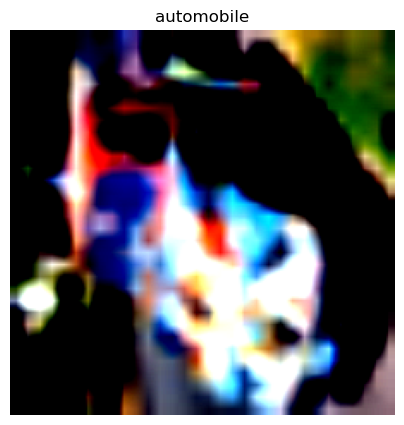

In [14]:
image, label = next(iter(train_dataloader))
image_batch, label_batch = image[0], label[0]
plt.figure(figsize=(5, 5))
plt.imshow(image_batch.permute(2, 1, 0))
plt.title(class_names[label_batch])
plt.axis("off");

### turn the image into patches

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9894737..1.1858855].


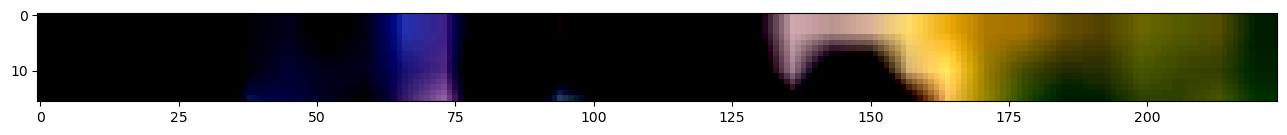

In [15]:
# Get the top row of the image
image_permuted = image_batch.permute(2, 1, 0)

# Index the top of the row pixels
patch_size = 16
plt.figure(figsize= (patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :]);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.8842265..2.1264887].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.37263146..0.7216902].


Number of patches per row: 14.0
 patch_size: 16 x 16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4325943..0.781653].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8368321..0.781653].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6757821..0.46684816].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22714932..0.24198757].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24302612..0.37690392].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.26503146..2.1264887].


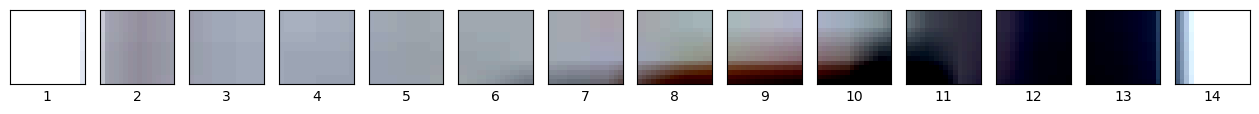

In [ ]:
# plot top row as patches
img_size = 224
patch_size = 16
num_of_patches = img_size / patch_size
assert img_size % patch_size == 0, "image size must be divisible by patch size"
print(f"Number of patches per row: {num_of_patches}\n patch_size: {patch_size} x {patch_size}")

# Create series of subplot
fig, ax = plt.subplots(nrows= 1,
                      ncols= int(num_of_patches),
                      sharex= True,
                      sharey = True,
                      figsize= (patch_size, patch_size))

# iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
  ax[i].imshow(image_permuted[:patch_size, patch: patch+patch_size, :]) # so here we take the first row from 0 to 16
  ax[i].set_xlabel(i+1)                                                 # and the col will start from 0 + patch_size
  ax[i].set_xticks([])                                                  # which will be then 16 + patch_size
  ax[i].set_yticks([]);

Number of patches per row: 14.0
 patch_size: 16 x 16


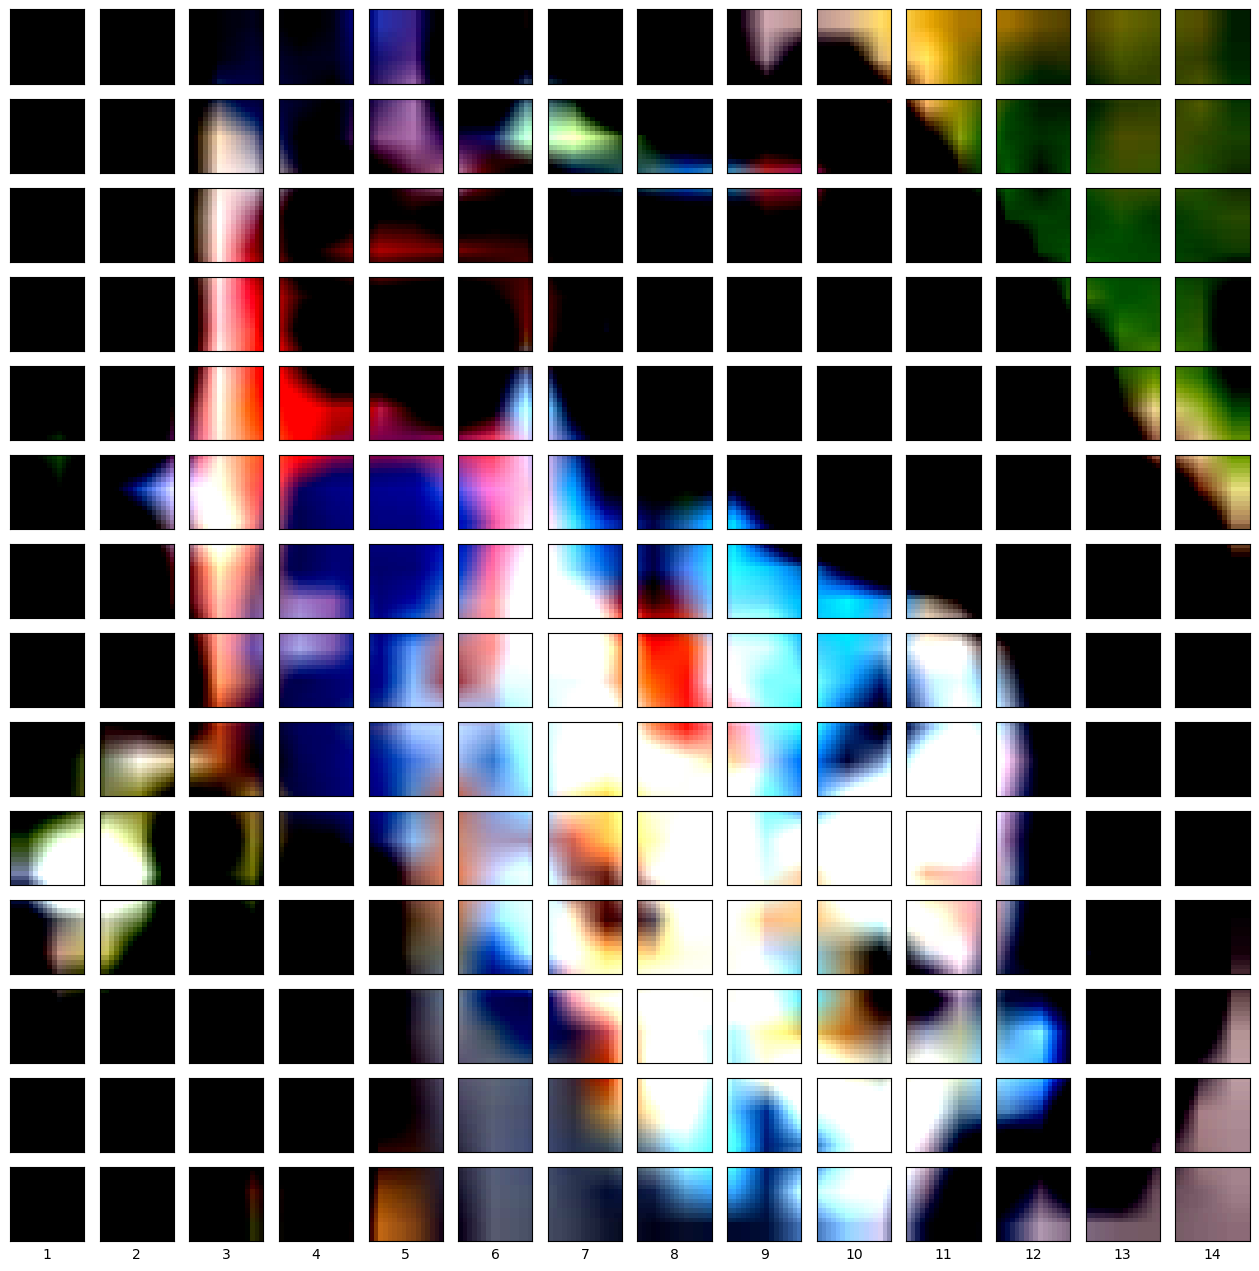

In [20]:
# setup the code to plot the whole picture as patches
img_size = 224
patch_size = 16
num_of_patches = img_size / patch_size
assert img_size % patch_size == 0, "image size must be divisible by patch size"
print(f"Number of patches per row: {num_of_patches}\n patch_size: {patch_size} x {patch_size}")

# Create series of subplot
fig, ax = plt.subplots(nrows= int(num_of_patches),
                      ncols= int(num_of_patches),
                      sharex= True,
                      sharey = True,
                      figsize= (patch_size, patch_size))

for i, patch_height in enumerate(range(0, img_size, patch_size)): #iterate through the height
  for j, patch_width in enumerate(range(0, img_size, patch_size)): #iterate through the width
    ax[i, j].imshow(image_permuted[patch_height: patch_height + patch_size, # loop through height patches
                                   patch_width: patch_width + patch_size, # loop through width patches
                                   :])
    ax[i, j].set_xlabel(j + 1)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].label_outer()

plt.show();

## Turn the patches into patch embeddings

---
- Now we have the number of patches -> (196), we need to turn it into embeddings -> (768) by using `torch.nn.conv2d` and setting the kernal size and stride parameters to `patch_size`.


In [21]:
# create conv2d layer to turn image into patches of learnable features maps (embedding)
from torch import nn

# set the patch size
patch_size = 16

# Create a conv2d layer with hyperparameters from vit
conv2d = nn.Conv2d(in_channels = 3, # color channels
                   out_channels = 768, # from ViT paper
                   kernel_size = patch_size,
                   stride = patch_size,
                   padding = 0)
conv2d

Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))

In [22]:
# pass the image into the conv2d layer
image_to_conv2d = conv2d(image_batch.unsqueeze(0)) # add batch dimention -> (batch_size, color_channels, height, width)
image_to_conv2d.shape

torch.Size([1, 768, 14, 14])

random conv feature maps: [304, 512, 642, 449, 381]


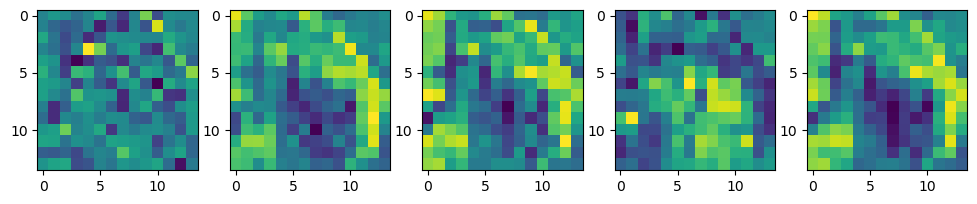

In [23]:
# plot random convolution feature maps (embeddings)
import random
random_indexes = random.sample(range(0, 768), k= 5)
print(f"random conv feature maps: {random_indexes}")
# create a plot
fig, ax = plt.subplots(nrows=1, ncols= 5, figsize= (12, 12))
for i, idx in enumerate(random_indexes):
  img_conv_feature_map = image_to_conv2d[:, idx, :, :]
  ax[i].imshow(img_conv_feature_map.permute(2, 1, 0).detach().numpy())


### Now we will flatten the image to be in the shape of `(batch, number_of_Patches, embedding_dimenstion )`

In [24]:
# flatten the image to  1x1
flatten_img = nn.Flatten(2, 3)
flattened_conv_image = flatten_img(image_to_conv2d)
flattened_conv_image = flattened_conv_image.permute(0, 2, 1)
print(flattened_conv_image.shape)

torch.Size([1, 196, 768])


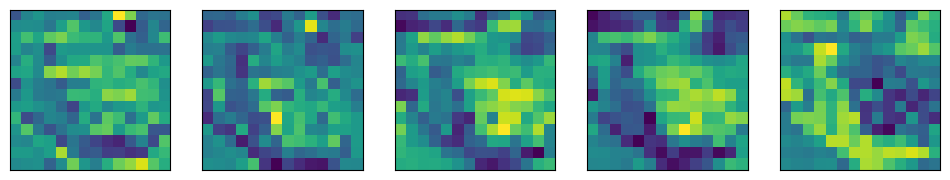

In [25]:
# Create a plot
random_indexes = random.sample(range(0, 768), k = 5)
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize= (12, 12))
for i, idx in enumerate(random_indexes):
  # Get the 'idx'-th embedding dimension values for all patches of the first image in the batch
  # This results in a (196,) tensor
  plot_data_1d = flattened_conv_image[0, :, idx]

  # Reshape it to a 2D grid (14x14) to represent the spatial distribution across patches
  # num_of_patches was calculated as 224/16 = 14
  reshaped_plot_data = plot_data_1d.reshape(int(num_of_patches), int(num_of_patches))

  ax[i].imshow(reshaped_plot_data.detach().numpy())
  ax[i].set(xticklabels = [], yticklabels = [], xticks = [], yticks= [])

(-0.5, 195.5, 0.5, -0.5)

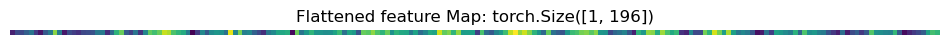

In [26]:
# Get a single flattened feature map
single_flattened = flattened_conv_image[:, :, 8]

plt.figure(figsize=(12, 12))
plt.imshow(single_flattened.detach().numpy())
plt.title(f"Flattened feature Map: {single_flattened.shape}")
plt.axis("off")

### Turning a ViT patch embedding into a pytorch Module

- Create a class named `PatchEmbedding` that inherits from `nn.Module`.
- Initialize the class with the required hyperparameters, including:
  - input channels
  - embedding dimension
  - patch size
- Add a convolutional layer (`nn.Conv2d`) to convert the input image into patch embeddings.
- Add a layer to flatten the convolution output into a sequence of patches.
- Implement the `forward()` method to define the forward pass through the convolution and flattening layers.
- Ensure the output tensor has the correct shape for patch embeddings (number of patches × embedding dimension).


In [27]:
import torch
from torch import nn

# Create a class called PatchEmbedding
class PatchEmbedding(nn.Module):
  """Turns a 2D input Image into a 1D Sequence learnable embedding vector.

  Args:
      in_channels (int): Number of color channels for the input image. default 3
      embedding_dim (int): Size of embedding to turn image into. default 768
      patch_size (int): Size of patches to convert input image into. default 16
  """
  # initialize the hyperparameter
  def __init__(self,
               in_channels = 3,
               embedding_dim = 768,
               patch_size = 16): # from vit
    super().__init__()

    self.patch_size = patch_size
  # create a layer to turn an image into embedded patches
    self.patched = nn.Conv2d(in_channels = in_channels,
                            out_channels = embedding_dim,
                            kernel_size = patch_size,
                            stride = patch_size)

  # create a layer to flatten the embedded patches
    self.flatten = nn.Flatten(start_dim = 2, end_dim = 3)

  # define forward method
  def forward(self, x):
    # Create assertion to check that the input image in the correct shape
    image_resolution = x.shape[-1]
    assert image_resolution % patch_size == 0,  f'input image must be divisible by patch size'

    # perform forward method
    x_patched = self.patched(x)
    x_flatten = self.flatten(x_patched)

    # make sure the returned sequence embedded in the right order (batch_size, number_of_patches, embedding_dimenstion)

    return x_flatten.permute(0, 2, 1)


In [28]:
patch_embed = PatchEmbedding(in_channels = 3,
                             embedding_dim = 768,
                             patch_size = 16)

# pass a single image through patch embed
print(f"Input image size: {image_batch.unsqueeze(0).shape}")
patch_embed_image = patch_embed(image_batch.unsqueeze(0)) # Add batch dimension to image_batch
print(f"output image size after patch embed: {patch_embed_image.shape}")

Input image size: torch.Size([1, 3, 224, 224])
output image size after patch embed: torch.Size([1, 196, 768])


In [29]:
rand_img_tensor = torch.randn(1, 3, 224, 224)
test_rand_img = patch_embed(rand_img_tensor)
test_rand_img.shape

torch.Size([1, 196, 768])

### Create a class token embedding
-> we here will prepend a learneble class token to the start of each patch embedding

In [30]:
patch_embed_image

tensor([[[-1.3598, -0.0326, -0.9836,  ..., -0.4059,  0.5351, -1.4895],
         [-0.8996, -0.0946, -0.8482,  ..., -0.5451,  0.4176, -1.3359],
         [-0.6038, -0.2229, -0.6623,  ..., -0.5172,  0.1874, -1.2928],
         ...,
         [ 0.2884,  0.1296, -0.3290,  ..., -0.1707, -0.3828, -0.4144],
         [ 0.3330,  0.1413,  0.2626,  ..., -0.0184, -0.5206,  0.2117],
         [ 0.3272, -0.0119,  0.3190,  ...,  0.1871, -0.2190,  0.3777]]],
       grad_fn=<PermuteBackward0>)

In [31]:
patch_embed_image.shape  # -> so the patch embed 196 (N) will always be added a one for each patch embed

torch.Size([1, 196, 768])

In [32]:
# get the batch size and embedding dimenstion

batch_size = patch_embed_image.shape[0]
embedding_dimenstion = patch_embed_image.shape[-1]

batch_size, embedding_dimenstion

(1, 768)

In [33]:
# Create a class embedding as a learnable parameter that share the same size as the embedding dimenstion
cls_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimenstion),
                         requires_grad=True)
cls_token.shape

torch.Size([1, 1, 768])

In [34]:
## add the cls_token to every patch dimension

patch_dimension_add_cls_token = torch.cat((cls_token, patch_embed_image),
                                          dim = 1) # dim = 1 means we adding it to the second in the list

print(patch_dimension_add_cls_token)
print(f"Sequence of patch embedding with class token prepend shape: {patch_dimension_add_cls_token.shape} -> (batch_size, cls_token + num_of_patches, embedding_dimenstion)")

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-1.3598, -0.0326, -0.9836,  ..., -0.4059,  0.5351, -1.4895],
         [-0.8996, -0.0946, -0.8482,  ..., -0.5451,  0.4176, -1.3359],
         ...,
         [ 0.2884,  0.1296, -0.3290,  ..., -0.1707, -0.3828, -0.4144],
         [ 0.3330,  0.1413,  0.2626,  ..., -0.0184, -0.5206,  0.2117],
         [ 0.3272, -0.0119,  0.3190,  ...,  0.1871, -0.2190,  0.3777]]],
       grad_fn=<CatBackward0>)
Sequence of patch embedding with class token prepend shape: torch.Size([1, 197, 768]) -> (batch_size, cls_token + num_of_patches, embedding_dimenstion)


In [35]:
patch_dimension_add_cls_token.shape

torch.Size([1, 197, 768])

### create a positional embedding
-> here we create a series of 1D learnable position embedding and to add them into the patch embedding

In [36]:
# calc the num of patches (N)
num_of_patches = int((height * width)/ patch_size**2)

# Getting the embedding dimension
embedding_dimenstion = patch_dimension_add_cls_token.shape[-1]

# Create the learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(1,
                                             num_of_patches + 1,
                                             embedding_dimenstion),
                                  requires_grad= True)

position_embedding, position_embedding.shape


(Parameter containing:
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True),
 torch.Size([1, 197, 768]))

In [37]:
# Add the position embedding to patch_dim_add_cls_token
patch_and_position_embedding = patch_dimension_add_cls_token + position_embedding

patch_and_position_embedding, patch_and_position_embedding.shape

(tensor([[[ 2.0000,  2.0000,  2.0000,  ...,  2.0000,  2.0000,  2.0000],
          [-0.3598,  0.9674,  0.0164,  ...,  0.5941,  1.5351, -0.4895],
          [ 0.1004,  0.9054,  0.1518,  ...,  0.4549,  1.4176, -0.3359],
          ...,
          [ 1.2884,  1.1296,  0.6710,  ...,  0.8293,  0.6172,  0.5856],
          [ 1.3330,  1.1413,  1.2626,  ...,  0.9816,  0.4794,  1.2117],
          [ 1.3272,  0.9881,  1.3190,  ...,  1.1871,  0.7810,  1.3777]]],
        grad_fn=<AddBackward0>),
 torch.Size([1, 197, 768]))

In [38]:
import torch
from torch import nn

class ViTInputLayer(nn.Module):
  def __init__(self,
                 img_size: int = 224,
                 in_channels: int = 3,
                 patch_size: int = 16,
                 embedding_dim: int = 768):
        super().__init__()

        self.img_size = img_size
        self.patch_size = patch_size
        self.embedding_dim = embedding_dim

        # 1. The Patching Layer + flattening
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size)
        self.flatten = nn.Flatten(2, 3)

        # 2. The CLS Token
        self.cls_token = nn.Parameter(torch.randn(1, 1, embedding_dim))

        # 3. Calculate Number of Patches
        self.num_patches = (img_size // patch_size) ** 2

        # 4. Create Position Embeddings based on img_size
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches + 1, embedding_dim))

  def forward(self, x):
    batch_size = x.shape[0]
    print(f"Original image shape {x.shape}")
    x = x.unsqueeze(0)
    print(f"input image shape: {x.shape}")
    # Patching & Flattening
    x = self.patcher(x) # (Batch, 768, 14, 14)
    x = self.flatten(x)
    x = x.permute(0, 2, 1) # (Batch, 196, 768)
    print(f"patch embedding:{x.shape}")
    # Prepend CLS token
    x = torch.cat((self.cls_token, x), dim=1) # (Batch, 197, 768)
    # Add Position Embedding
    return x + self.pos_embedding


In [39]:
patch_embed = ViTInputLayer()
img_tensor = torch.randn(3, 224, 224)

In [40]:
final_image = patch_embed(img_tensor)

Original image shape torch.Size([3, 224, 224])
input image shape: torch.Size([1, 3, 224, 224])
patch embedding:torch.Size([1, 196, 768])


In [41]:
final_image.shape

torch.Size([1, 197, 768])

## Equation 2: Multi-Head Self Attention (MSA Block)


In [42]:
class MultiHeadSelfAttention(nn.Module):
  """Create a Multi-Head Self-Attention block"""
  def __init__(self,
               embedding_dim : int = 768, # Hidden size of D (embedded dimention)
               num_heads : int = 12, # from the table 1
               dropout: float = 0.0):
    super().__init__()
    self.embedding_dim = embedding_dim
    self.num_heads = num_heads

    #Create a Layer Norm
    self.LN = nn.LayerNorm(normalized_shape= embedding_dimenstion)

    # Create a multi-head attention layer
    self.MSA = nn.MultiheadAttention(embed_dim= embedding_dim,
                                     num_heads= num_heads,
                                     dropout= dropout,
                                     batch_first = True)

  def forward(self, x):
    x = self.LN(x)
    attn_output, _ = self.MSA(query = x,
                              key = x,
                              value = x,
                              need_weights = False)
    new_output = attn_output + x
    return new_output

In [43]:
msa = MultiHeadSelfAttention()


In [44]:
new_output = msa(final_image)

In [45]:
new_output

tensor([[[ 0.8124,  1.8472,  1.1741,  ...,  0.3151,  0.8073,  1.2234],
         [ 0.3833, -1.0673,  0.3292,  ..., -0.5531,  0.5640,  0.6243],
         [-0.5415,  0.2111,  0.0778,  ...,  1.6939, -0.6560, -1.6015],
         ...,
         [-1.6671,  1.5336,  0.1309,  ..., -0.2095,  0.1175, -0.3863],
         [ 2.8047, -1.2082,  0.5714,  ...,  1.2376, -0.3844,  0.1953],
         [ 0.6221,  0.3240, -0.9664,  ..., -0.5730, -0.3079, -1.2524]]],
       grad_fn=<AddBackward0>)

## 6. Equation 3: Multilayer Perceptron (MLP Block)

- **MLP**:  
  The MLP consists of **two layers** with a **GELU non-linearity** (see Section 3.1).

- **Definition**:  
  MLP is a broad term referring to a block composed of a series of layer(s).  
  The number of layers can vary (multiple layers or even a single hidden layer).

- **Layer terminology**:  
  The following terms often refer to the same concept:
  - Fully-connected  
  - Dense  
  - Linear  
  - Feed-forward  

  Framework-specific naming:
  - **PyTorch**: `torch.nn.Linear`

- **GELU activation (PyTorch)**:  
  <https://pytorch.org/docs/stable/generated/torch.nn.GELU.html#torch.nn.GELU>

- **Dropout**:  
  When used, dropout is applied:
  - After every dense layer  
  - **Except** for the QKV projections  
  - Immediately after adding positional embeddings to patch embeddings  

  Hybrid models are trained using the same setup as their ViT counterparts.

---


```python
# MLP
x = linear -> non-linear -> dropout -> linear -> dropout


In [46]:
class MLPBlock(nn.Module):
  """implementing the MLP block from the paper"""
  def __init__(self,
               embedding_dimenstion: int = 768,
               expanded_features: int = 3072,
               dropout: float = 0.0):
    super().__init__()
    self.embedding_dimenstion = embedding_dimenstion
    self.dropout = dropout
    self.expanded_features = expanded_features

    # Create the Layer Norm
    self.LN = nn.LayerNorm(normalized_shape= embedding_dimenstion)

    # Create the sequence of the MLP Block
    self.MLP = nn.Sequential(
                             nn.Linear(in_features = embedding_dimenstion,
                                       out_features= expanded_features,
                                       ),
                             nn.GELU(),
                             nn.Dropout(p= dropout),
                             nn.Linear(in_features = expanded_features,
                                       out_features = embedding_dimenstion),
                            nn.Dropout(p= dropout))
  def forward(self, x):

    return x + self.MLP((self.LN(x)))

In [47]:
mlp = MLPBlock()

In [48]:
new_output_third_equation = mlp(new_output)

In [49]:
new_output_third_equation

tensor([[[ 0.8870,  1.6917,  1.2471,  ...,  0.1007,  1.0329,  0.9303],
         [ 0.5357, -1.3679,  0.4437,  ..., -0.7761,  0.6941,  0.5674],
         [-0.8460,  0.2250,  0.2515,  ...,  1.6329, -0.4466, -1.4319],
         ...,
         [-1.6858,  1.4624,  0.0961,  ..., -0.1460,  0.3244, -0.5222],
         [ 3.1484, -0.9727,  0.8680,  ...,  1.3700, -0.3796,  0.0971],
         [ 0.7272,  0.2155, -0.9820,  ..., -0.6544, -0.3163, -1.3921]]],
       grad_fn=<AddBackward0>)

In [50]:
class Transformer_Encoder(nn.Module):
    def __init__(self,
                 embedding_dimenstion: int = 768,
                 num_heads: int = 12,
                 mlp_size: int = 3072,
                 dropout: float = 0.1):
        super().__init__()

        # 1. Separate Layer Norms for separate tasks
        self.ln1 = nn.LayerNorm(normalized_shape=embedding_dimenstion)
        self.ln2 = nn.LayerNorm(normalized_shape=embedding_dimenstion)

        # 2. MSA Block
        self.MSA = nn.MultiheadAttention(embed_dim=embedding_dimenstion,
                                         num_heads=num_heads,
                                         dropout=dropout,
                                         batch_first=True)

        # 3. MLP Block (Keeping your clean Sequential logic)
        self.MLP = nn.Sequential(
            nn.Linear(in_features=embedding_dimenstion, out_features=mlp_size),
            nn.GELU(),
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, out_features=embedding_dimenstion),
            nn.Dropout(p=dropout)
        )

    def forward(self, x):
        # Equation 2: MSA + Residual (Using the first LayerNorm)
        # x_norm1 = self.ln1(x)
        x = x + self.MSA(query=self.ln1(x),
                         key=self.ln1(x),
                         value=self.ln1(x),
                         need_weights=False)[0]

        # Equation 3: MLP + Residual (Using the second LayerNorm)
        # x_norm2 = self.ln2(x)
        x = x + self.MLP(self.ln2(x))

        return x

In [51]:
Transformer_Encoder_Block = Transformer_Encoder()

In [52]:
encoded_data = Transformer_Encoder_Block(final_image)

In [53]:
encoded_data

tensor([[[ 1.1760,  2.6231,  1.3105,  ...,  0.3926,  1.4284,  1.4952],
         [ 0.3492, -1.1197,  0.6093,  ..., -0.5248,  0.5639,  0.8628],
         [-0.6205,  0.1574, -0.2963,  ...,  2.0109, -0.7865, -1.6813],
         ...,
         [-1.8941,  1.7833, -0.1838,  ..., -0.1806,  0.1084, -0.4231],
         [ 3.0572, -1.6812,  0.7895,  ...,  1.1730, -0.6864, -0.0115],
         [ 0.4367,  0.2488, -1.3795,  ..., -0.4437, -0.4715, -2.1704]]],
       grad_fn=<AddBackward0>)

In [54]:
from torchinfo import summary
summary(model = Transformer_Encoder_Block,
        input_size = [1, 197, 768],
        col_names = ["input_size", "output_size", "num_params", "trainable"],
        col_width= 20)

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Trainable
Transformer_Encoder                      [1, 197, 768]        [1, 197, 768]        --                   True
├─LayerNorm: 1-1                         [1, 197, 768]        [1, 197, 768]        1,536                True
├─LayerNorm: 1-2                         [1, 197, 768]        [1, 197, 768]        (recursive)          True
├─LayerNorm: 1-3                         [1, 197, 768]        [1, 197, 768]        (recursive)          True
├─MultiheadAttention: 1-4                --                   [1, 197, 768]        2,362,368            True
├─LayerNorm: 1-5                         [1, 197, 768]        [1, 197, 768]        1,536                True
├─Sequential: 1-6                        [1, 197, 768]        [1, 197, 768]        --                   True
│    └─Linear: 2-1                       [1, 197, 768]        [1, 197, 3072]       2,362,368            True
│    └─GELU: 2

In [55]:
class ViT(nn.Module):
  """Implement patch_embedding, Equation_2 and Equation_3 architecture"""
  def __init__(self,
               img_size: int = 224,
               in_channels: int = 3,
               embedding_dimenstion: int = 768,
               patch_size: int = 16,
               num_heads: int = 12,
               mlp_size: int = 3072,
               num_transformer_layers: int = 12,
               dropout: float = 0.1,
               num_classes: int = 3):
    super().__init__()
    """
    Args:
     img_size (int): Input image height and width. Default: 224
     in_channels (int): Number of input image channels. Default: 3
     embedding_dimenstion (int): Size of token embeddings (D). Default: 768
     patch_size (int): Size of image patches. Default: 16
     num_heads (int): Number of attention heads. Default: 12
     mlp_size (int): Hidden size of the MLP block (typically 4×D). Default: 3072
     dropout (float): Dropout probability. Default: 0.1
    """
    self.embedding_dimenstion = embedding_dimenstion
    self.patch_size = patch_size
    self.dropout = dropout

    # The Patching Layer + flattening
    self.patcher = nn.Conv2d(in_channels = in_channels,
                             out_channels = embedding_dimenstion,
                             kernel_size= patch_size,
                             stride = patch_size)
    self.flattening = nn.Flatten(2, 3)

    # CLS Token
    self.cls_token = nn.Parameter((torch.randn(1, 1, embedding_dimenstion)))

    # Calculate Number of Patches
    self.num_patches = (img_size // patch_size) ** 2

    # Pos embedding
    self.pos_embedding = nn.Parameter((torch.randn(1, 1 + self.num_patches, embedding_dimenstion)))


    self.transformer_encoder = nn.Sequential(*[Transformer_Encoder(
            embedding_dimenstion=embedding_dimenstion,
            num_heads=num_heads,
            mlp_size=mlp_size,
            dropout=dropout) for _ in range(num_transformer_layers)]
        )

    self.classifier = nn.Sequential(
        nn.LayerNorm(normalized_shape = embedding_dimenstion),
        nn.Linear(in_features = embedding_dimenstion,
                  out_features = num_classes)
    )

  def forward(self, x):
    if x.dim() == 3:
      x = x.unsqueeze(0)
    # Create assertion about image resolution
    image_resolution = x.shape[-1]
    assert image_resolution % self.patch_size == 0, f"image resolution should be divisible by the patch size"

    x = self.patcher(x)
    x = self.flattening(x)
    x = x.permute(0, 2, 1)

    # Adding the class token
    B = x.shape[0]
    cls = self.cls_token.expand(B, -1, -1)  # (B, 1, D)
    x = torch.cat((cls, x), dim=1) # (Batch, 197, 768)

    # Add Position Embedding
    x = x + self.pos_embedding

    # Apply the transformer encoder
    x = self.transformer_encoder(x)

    # Select the 0-th index (CLS token) from the sequence dimension
    x = x[:, 0]
    x = self.classifier(x)

    return x

In [56]:
vit_block = ViT()

In [57]:
image = torch.randn(3, 224, 224)
final_image = vit_block(image)

In [58]:
final_image

tensor([[0.3552, 0.4045, 0.4935]], grad_fn=<AddmmBackward0>)

In [62]:
summary(model = ViT(),
        input_size = [3, 224, 224],
        col_names = ["input_size", "output_size", "num_params", "trainable"],
        col_width= 30)

Layer (type:depth-idx)                   Input Shape                    Output Shape                   Param #                        Trainable
ViT                                      [3, 224, 224]                  [1, 3]                         152,064                        True
├─Conv2d: 1-1                            [1, 3, 224, 224]               [1, 768, 14, 14]               590,592                        True
├─Flatten: 1-2                           [1, 768, 14, 14]               [1, 768, 196]                  --                             --
├─Sequential: 1-3                        [1, 197, 768]                  [1, 197, 768]                  --                             True
│    └─Transformer_Encoder: 2-1          [1, 197, 768]                  [1, 197, 768]                  --                             True
│    │    └─LayerNorm: 3-1               [1, 197, 768]                  [1, 197, 768]                  1,536                          True
│    │    └─LayerNorm: 3

In [63]:
vit_paper = ViT(num_classes=10)

In [64]:
image = torch.randn(3, 224, 224)
final_image = vit_paper(image)

In [65]:
final_image

tensor([[ 0.1411,  1.2280, -0.0552,  0.3390,  0.2533, -0.2479,  0.3684,  0.9285,
         -0.2671, -0.3705]], grad_fn=<AddmmBackward0>)

###  Creating an Optimizer

The paper states that it uses the **Adam optimizer** (Section 4: *Training & Fine-tuning*) with the following settings:

- **β₁ (B1)** = 0.9  
- **β₂ (B2)** = 0.999 (default values)  
- **Weight decay** = 0.1  

### Weight Decay
Weight decay is a **regularization technique** that adds a small penalty to the loss function, usually the **L2 norm of the model weights** (i.e., all trainable parameters).

### Regularization
Regularization techniques help **prevent overfitting** by discouraging overly large weights and improving generalization.


In [66]:
## optimization function
optim_function = torch.optim.Adam(vit_paper.parameters(),
                                  lr = 1e-3,
                                  betas = (0.9, 0.999),
                                  weight_decay = 0.1)

## since the paper didnt declare what loss function they used and since this problem is multi-class classification problem
loss_function = nn.CrossEntropyLoss()

In [70]:
# Install torchmetrics if it's not already installed
try:
  from torchmetrics import Accuracy
except ModuleNotFoundError:
  print("[INFO] torchmetrics not found, installing...")
  !pip install torchmetrics

In [71]:
import sys
sys.path.append('/home/ibrahim/Desktop/python /Machine Learning projects/ViT/vit-implementation')

In [72]:
from helping_functions import engine

from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

# Training dataset
train_data = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform
)

# Test dataset
test_data = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_data,
    batch_size=32,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

test_loader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)
from torchvision import transforms

# ViT-Base standard transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # ImageNet => (ViT standard)
        std=[0.229, 0.224, 0.225]
    )
])


In [73]:
import torch

vit_paper = ViT(num_classes=10).to(device) 

# Loss function
loss_function = torch.nn.CrossEntropyLoss() 

optim_function = torch.optim.Adam(
    params=vit_paper.parameters(),
    lr=3e-4, # Learning rate
    weight_decay=0.1 # Helps with regularization
)

In [74]:
import torchmetrics

acc_fn = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)


In [ ]:
import torchmetrics

# Move the model to the specified device
vit_paper.to(device)

result = engine.train(model=vit_paper,
                      train_dataloader = train_loader,
                      test_dataloader = test_loader,
                      optimizer = optim_function,
                      loss_fn = loss_function,
                      epochs = 10,
                      accuracy_fn = torchmetrics.Accuracy("multiclass",
                                                          num_classes = 10).to(device),
                      device = device)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
image, label = next(iter(train_loader))

In [ ]:
image.shape

In [67]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. Define the correct ViT-Base transforms
vit_transform = transforms.Compose([
    transforms.Resize((224, 224)), # Essential for 16x16 patcher
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], # Stabilizes LayerNorm
        std=[0.229, 0.224, 0.225]
    )
])

# 2. Re-load datasets with the vit_transform
train_data = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=vit_transform # Applying here
)

test_data = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=vit_transform # Applying here
)

# 3. Re-create Loaders to use the updated data
train_loader = DataLoader(
    train_data,
    batch_size=32, # Stick with 32 due to VRAM load
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

test_loader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False,
    num_workers=2,
    pin_memory=True
)

In [3]:
vit_paper.to(device)

from helping_functions import engine
result = engine.train(model=vit_paper,
                      train_dataloader = train_loader,
                      test_dataloader = test_loader,
                      optimizer = optim_function,
                      loss_fn = loss_function,
                      epochs = 5,
                      accuracy_fn = acc_fn,
                      device = "cpu")

NameError: name 'vit_paper' is not defined